In [23]:
!pip install pmdarima

In [24]:
import pandas as pd
import numpy as np

In [25]:
df = pd.read_csv('C:\\Users\\HP\\Desktop\\project1\\sampledatamonthly1.csv')
df = df.dropna()
print('Shape of Data', df.shape)
df.head()

Shape of Data (48, 2)


,Date,Actuals
0,01-07-2018,123739.76
1,01-08-2018,119569.00
2,01-09-2018,110460.71
3,01-10-2018,135560.57
4,01-11-2018,120747.70


<AxesSubplot:>

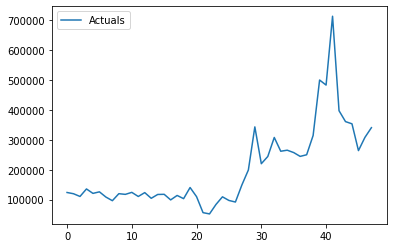

In [26]:
df.plot()

In [27]:
df.set_index('Date', inplace=True)

In [28]:
df.index

Index(['01-07-2018', '01-08-2018', '01-09-2018', '01-10-2018', '01-11-2018',
       '01-12-2018', '01-01-2019', '01-02-2019', '01-03-2019', '01-04-2019',
       '01-05-2019', '01-06-2019', '01-07-2019', '01-08-2019', '01-09-2019',
       '01-10-2019', '01-11-2019', '01-12-2019', '01-01-2020', '01-02-2020',
       '01-03-2020', '01-04-2020', '01-05-2020', '01-06-2020', '01-07-2020',
       '01-08-2020', '01-09-2020', '01-10-2020', '01-11-2020', '01-12-2020',
       '01-01-2021', '01-02-2021', '01-03-2021', '01-04-2021', '01-05-2021',
       '01-06-2021', '01-07-2021', '01-08-2021', '01-09-2021', '01-10-2021',
       '01-11-2021', '01-12-2021', '01-01-2022', '01-02-2022', '01-03-2022',
       '01-04-2022', '01-05-2022', '01-06-2022'],
      dtype='object', name='Date')

In [29]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Actuals,48.0,202257.384375,135257.440084,52049.47,110255.615,125017.45,264221.2125,713391.82


<AxesSubplot:xlabel='Date'>

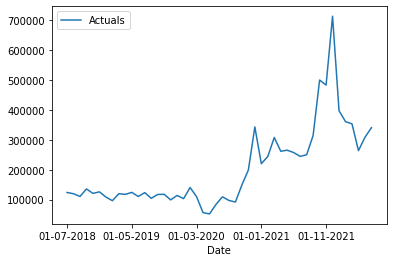

In [30]:
df.plot()

In [31]:
from statsmodels.tsa.stattools import adfuller

In [32]:
def ad_test(dataset):
    dftest = adfuller(dataset, autolag = 'AIC')
    print("1. ADF :",dftest[0])
    print("2. P-Value :",dftest[1])
    print("3. Num of Lags :",dftest[2])
    print("4. Num of observation used for ADF Regression and critical Values Calculation :",dftest[3])
    print("5. Critical Values :")
    for key, val in dftest[4].items():
        print("\t",key,":", val)

In [33]:
ad_test(df['Actuals'])

1. ADF : -1.8465493359205636
2. P-Value : 0.35760818387285986
3. Num of Lags : 0
4. Num of observation used for ADF Regression and critical Values Calculation : 47
5. Critical Values :
	 1% : -3.5778480370438146
	 5% : -2.925338105429433
	 10% : -2.6007735310095064


In [35]:
# split Data
x = df
train = x[:len(x)-9]
test = x[len(x)-9:]


In [39]:
from pmdarima import auto_arima
# ignore harmless warning
import warnings
warnings.filterwarnings("ignore")

In [41]:
stepwize_fit = auto_arima(train['Actuals'], trace=True, suppress_warnings = True)

stepwize_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=922.613, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=918.292, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=918.318, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=917.711, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=916.882, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=919.729, Time=0.05 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.352 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   39
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -457.441
Date:                Sat, 23 Jul 2022   AIC                            916.882
Time:                        16:22:48   BIC                            918.520
Sample:                             0   HQIC                           917.465
                                 - 39                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       1.63e+09   2.12e+08      7.674      0.000    1.21e+09    2.05e+09
===================================================================================
Ljung-Box (L1) (Q):                   2.10   Jarque-Bera (JB):                24.05
Prob(Q):                              0.15   Prob(JB):                         0.00
Heteroskedasticity (H):              19.28   Skew:                             0.34
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [45]:
from statsmodels.tsa.arima.model import ARIMA

In [46]:
print(train.shape, test.shape)

(39, 1) (9, 1)


In [59]:
model = ARIMA(train['Actuals'], order=(1,1,0))
model =  model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Actuals   No. Observations:                   39
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -456.637
Date:                Sat, 23 Jul 2022   AIC                            917.273
Time:                        16:35:12   BIC                            920.549
Sample:                             0   HQIC                           918.439
                                 - 39                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1875      0.097     -1.928      0.054      -0.378       0.003
sigma2      1.635e+09   8.27e-12   1.98e+20      0.000    1.63e+09    1.63e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.34   Jarque-Bera (JB):                31.93
Prob(Q):                              0.56   Prob(JB):                         0.00
Heteroskedasticity (H):              18.89   Skew:                             1.04
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.12e+38. Standard errors may be unstable.
"""

In [61]:
start = len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start, end=end, type='levels')
print(pred)
pred.index=df.index[start:end+1]

39    302404.528652
40    304673.118436
41    304247.826600
42    304327.555931
43    304312.609098
44    304315.411176
45    304314.885871
46    304314.984350
47    304314.965888
Name: predicted_mean, dtype: float64


<AxesSubplot:xlabel='Date'>

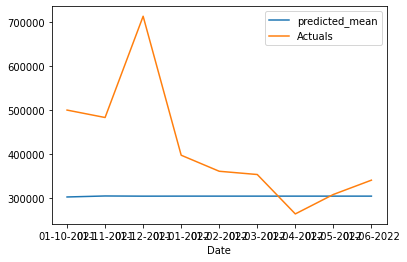

In [65]:
pred.plot(legend=True)
test['Actuals'].plot(legend=True)

In [66]:
test['Actuals'].mean()

413423.95666666667

In [67]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['Actuals']))
print(rmse)

168498.14811784023


In [70]:
model2= ARIMA(df['Actuals'], order=(1,1,0))
model2=model2.fit()
df.tail()

,Actuals
Date,
01-02-2022,360875.89
01-03-2022,353478.85
01-04-2022,263880.15
01-05-2022,308093.45
01-06-2022,340617.30


In [71]:
index_future_dates=pd.date_range(start='01-06-2022', end='01-09-2022')
print(index_future_dates)

DatetimeIndex(['2022-01-06', '2022-01-07', '2022-01-08', '2022-01-09'], dtype='datetime64[ns]', freq='D')


In [77]:
pred=model2.predict(start=len(df), end=len(df)+3,type='levels').rename('ARIMA predictions')
pred.index=index_future_dates

In [78]:
print(pred)

2022-01-06    332202.026644
2022-01-07    334379.408032
2022-01-08    333816.028863
2022-01-09    333961.798497
Freq: D, Name: ARIMA predictions, dtype: float64


<AxesSubplot:>

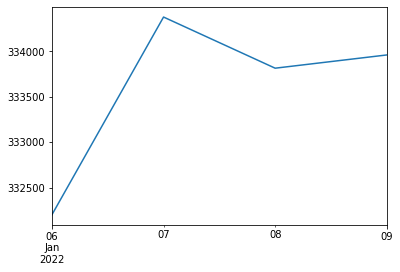

In [79]:
pred.plot()